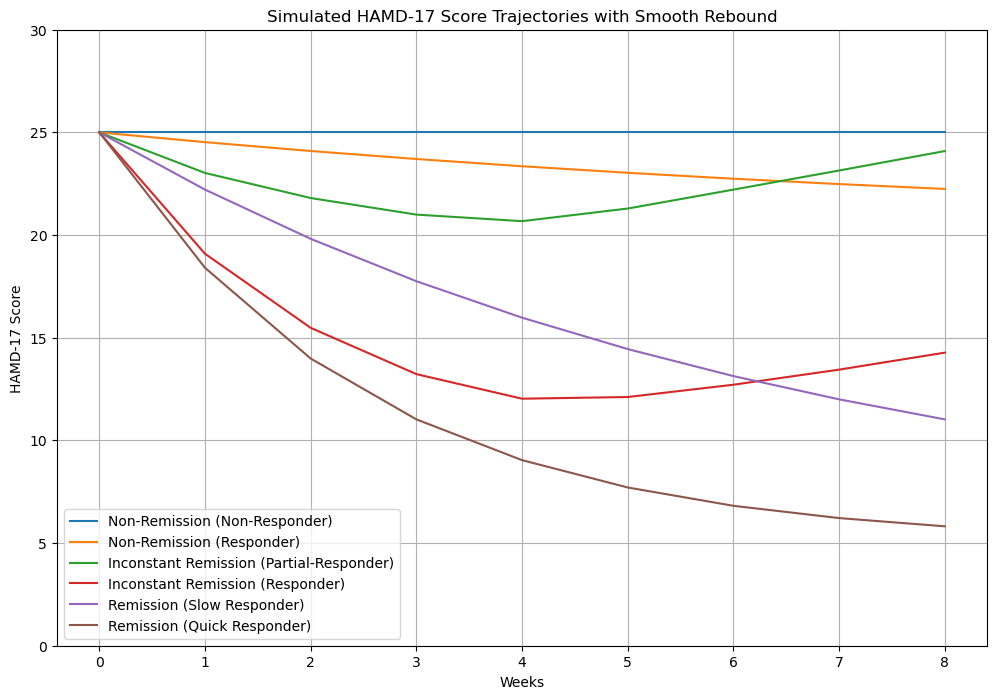

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def hamd_model_with_smooth_rebound(baseline, reduction_rate, target_reduction, residual_score, rebound_start, rebound_rate, rebound_steepness, weeks):
    """
    Simulates HAMD-17 score changes with a smooth rebound effect.

    Args:
        baseline: Initial HAMD-17 score.
        reduction_rate: Rate of reduction per week.
        target_reduction: Total target reduction.
        residual_score: The minimum HAMD-17 score that is reached.
        rebound_start: Week at which the rebound starts.
        rebound_rate: Rate of increase during the rebound.
        rebound_steepness: Controls how abruptly the rebound starts. Higher values make it more abrupt.
        weeks: Number of weeks to simulate. Let's fix this number to be 8, so only 7 variables for each patient

    Returns:
        A list of HAMD-17 scores for each week.
    """
    hamd_scores = []
    for week in range(weeks + 1):
        hamd = residual_score + (baseline - residual_score) * np.exp(-reduction_rate * week)

        # Smooth approximation of a step function for the rebound
        rebound_factor = 1 / (1 + np.exp(-rebound_steepness * (week - rebound_start)))
        rebound_increase = rebound_rate * (week - rebound_start) * rebound_factor
        hamd += rebound_increase

        hamd_scores.append(hamd)
    return hamd_scores

# Scenario Parameters (Estimates) - Include rebound parameters
scenarios = {
    "Non-Remission (Non-Responder)": {"baseline": 25, "reduction_rate": 0.01, "target_reduction": 0, "residual_score": 25, "rebound_start": 100, "rebound_rate": 0, "rebound_steepness": 1}, #No rebound
    "Non-Remission (Responder)": {"baseline": 25, "reduction_rate": 0.1, "target_reduction": 5, "residual_score": 20, "rebound_start": 100, "rebound_rate": 0, "rebound_steepness": 1}, #No rebound
    "Inconstant Remission (Partial-Responder)": {"baseline": 25, "reduction_rate": 0.5, "target_reduction": 10, "residual_score": 20, "rebound_start": 4, "rebound_rate": 1, "rebound_steepness": 2},
    "Inconstant Remission (Responder)": {"baseline": 25, "reduction_rate": 0.5, "target_reduction": 15, "residual_score": 10, "rebound_start": 4, "rebound_rate": 1, "rebound_steepness": 2},
    "Remission (Slow Responder)": {"baseline": 25, "reduction_rate": 0.15, "target_reduction": 20, "residual_score": 5, "rebound_start": 100, "rebound_rate": 0, "rebound_steepness": 1}, #No rebound
    "Remission (Quick Responder)": {"baseline": 25, "reduction_rate": 0.4, "target_reduction": 20, "residual_score": 5, "rebound_start": 100, "rebound_rate": 0, "rebound_steepness": 1}, #No rebound
}

weeks = 8

# Plotting
plt.figure(figsize=(12, 8))
for scenario_name, params in scenarios.items():
    hamd_scores = hamd_model_with_smooth_rebound(**params, weeks=weeks)
    plt.plot(range(weeks + 1), hamd_scores, label=scenario_name)

plt.xlabel("Weeks")
plt.ylabel("HAMD-17 Score")
plt.title("Simulated HAMD-17 Score Trajectories with Smooth Rebound")
plt.legend()
plt.grid(True)
plt.xticks(range(weeks+1))
plt.ylim(0,30)
plt.show()